In [1]:
%pip install mne

  Using cached mne-1.10.1-py3-none-any.whl (7.4 MB)
  Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
  Using cached matplotlib-3.10.6-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.60.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (4.8 MB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.w

Channels: ['Fp1', 'Fp2', 'O1', 'O2', 'Accel_x', 'Accel_y', 'Accel_z', 'Digital', 'Sample']
Sampling frequency (Hz): 250.0
Recording duration (s): 59.996
Data shape: (9, 15000)


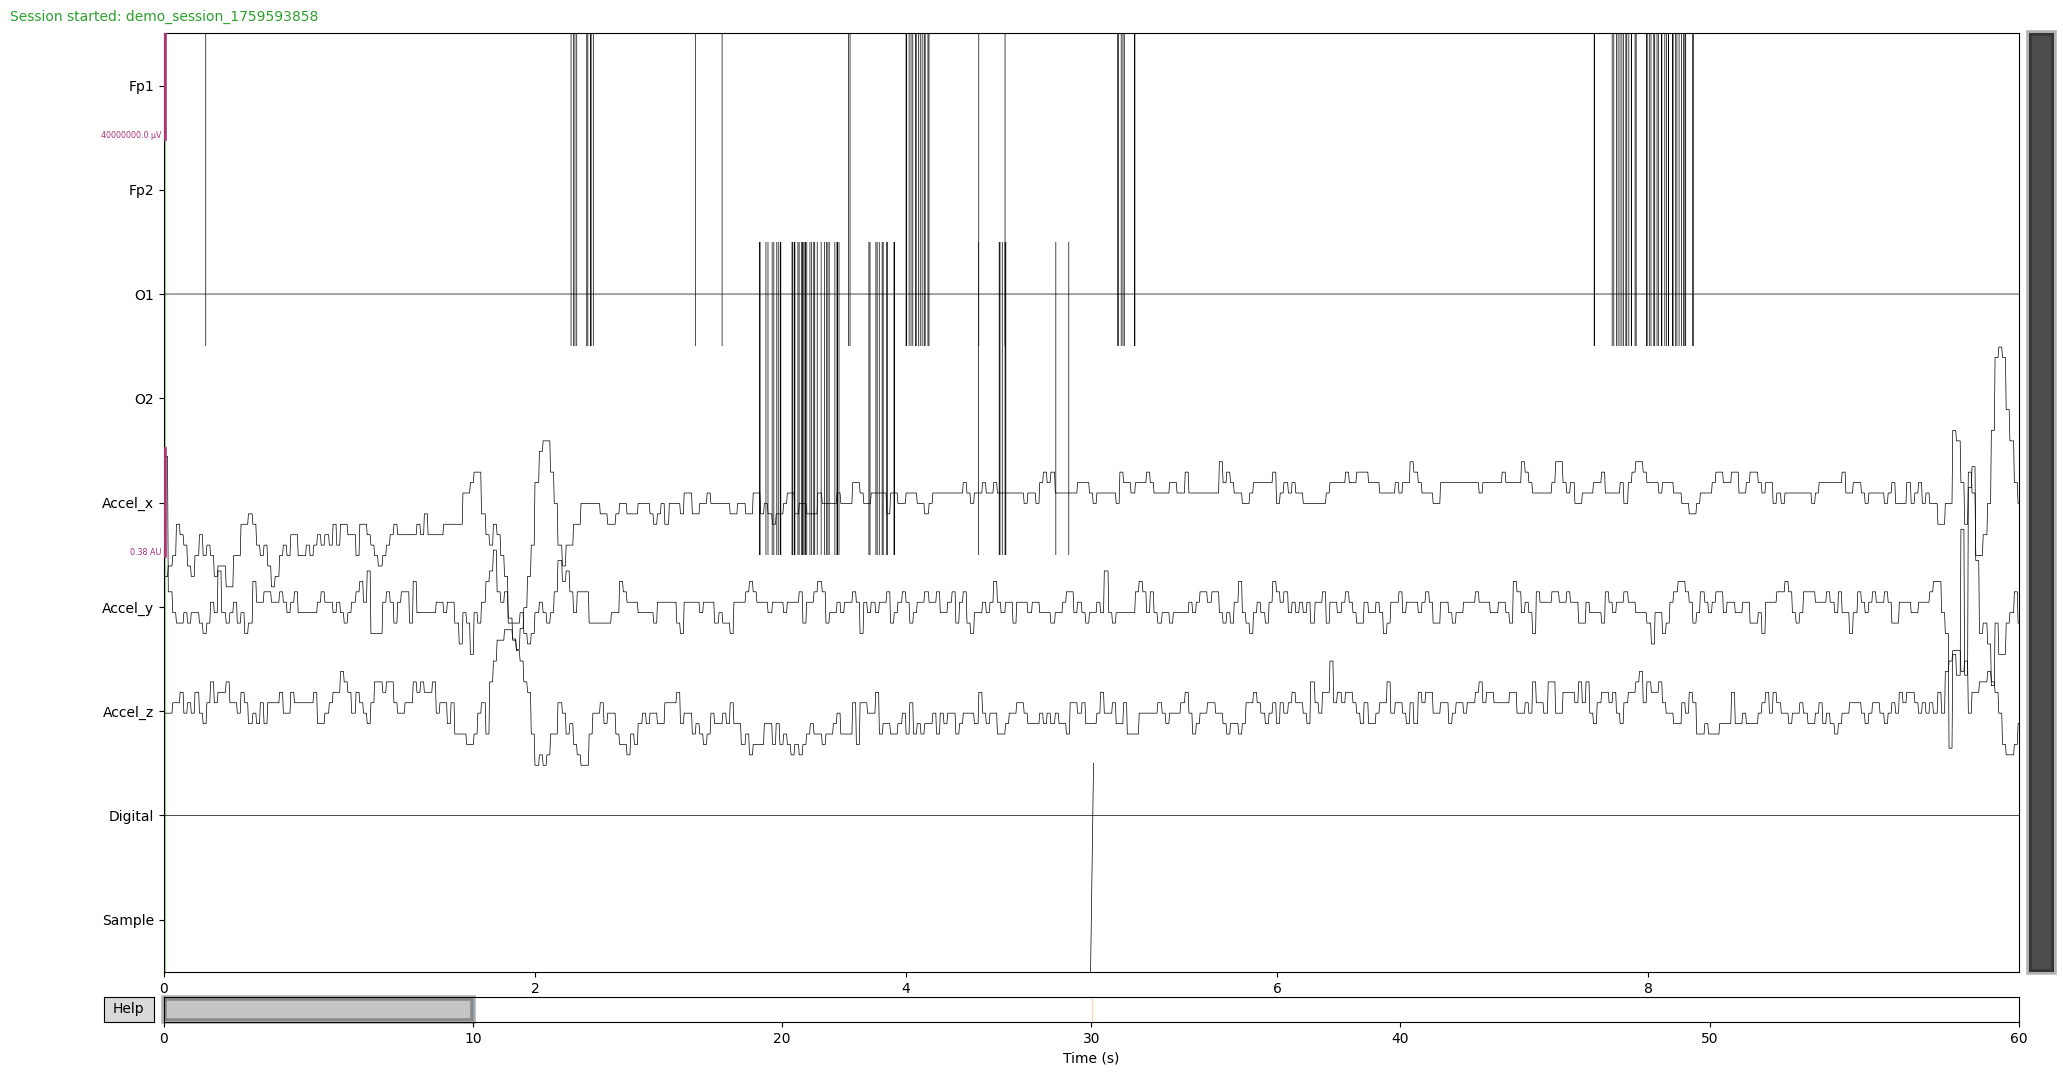

Events found: 0


/home/grzesiek/HackYeah/venv/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


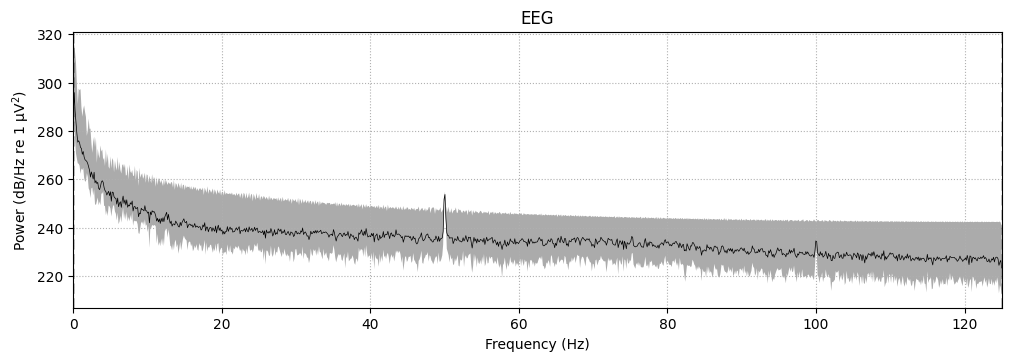

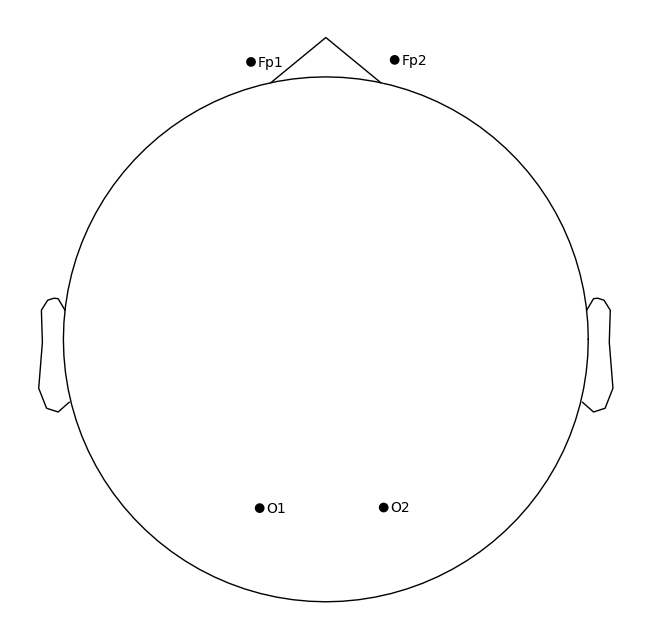

Bad channels: []


In [3]:
# 1. Import packages
import mne
import matplotlib.pyplot as plt

# 2. Load the .fif file
file_path = "eeg_data/test_subject/test_subject_demo_session_1759593858_1759593858_raw.fif"
raw = mne.io.read_raw_fif(file_path, preload=True)

# Convert data from Volts to microvolts for analysis if needed
# Note: MNE plotting functions often handle scaling automatically.
# This step modifies the data in the raw object.
raw.apply_function(lambda x: x * 1e6)
# Update channel unit information
raw.rename_channels({ch_name: ch_name.replace(' (V)', ' (µV)') for ch_name in raw.ch_names})


# 3. Basic metadata
print("Channels:", raw.info['ch_names'])
print("Sampling frequency (Hz):", raw.info['sfreq'])
print("Recording duration (s):", raw.times[-1])
print("Data shape:", raw._data.shape)

# 4. Plot raw data segment
# After converting to µV, 'auto' scaling might be too large.
# We can specify a manual scaling or let MNE know the unit.
scalings = dict(eeg=20) # A reasonable starting point for µV
raw.plot(n_channels=10, scalings=scalings, title='Raw EEG Data Preview (µV)')

# 5. Check events (triggers/epochs)
events = mne.find_events(raw, stim_channel=None, verbose=False)
print("Events found:", events.shape[0])
if events.shape[0] > 0:
    print("First 5 events:", events[:5])

# 6. Plot power spectral density
# The PSD plot will now be in (µV)^2/Hz
raw.plot_psd(area_mode='range', average=True)

# 7. Plot channel locations (if available)
mne.viz.plot_sensors(raw.info, show_names=True)

# 8. Show artifact summary (optional, for ECG/EOG or bad channels)
print("Bad channels:", raw.info['bads'])
if "EOG" in ",".join(raw.info['ch_names']):
    mne.preprocessing.create_eog_epochs(raw).average().plot()
if "ECG" in ",".join(raw.info['ch_names']):
    mne.preprocessing.create_ecg_epochs(raw).average().plot()
